<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Code_challenge.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

* GitHub: https://github.com/MoteneJan/Vegetable-Prices-Analysis
* Trello: https://trello.com/b/JpTf5bv0/workplace-module-project

## Analysing Vegetables Prices Over Time

<a id="cont"></a>

* <b> 1 [Project Overview](#1-project-overview)
    * 1.1 [Problem Statement](#2-problem-statement)
    * 1.2 [Data Source](#2-data-source)
    * 1.2 [Key Objectives](#3-key-objectivest)
* <b> 2. [Importing Packages](#2-importing-packages)
* <b> 3. [Loading Data](#3-loading-data)
* <b> 4. [Data Cleaning](#4-data-cleaning)
* <b> 5. [Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis-eda)
    

________________________________________________________________________________________________________________________________________
## 1. Project Overview
<a class="anchor" id="1-project-overview"></a>

### 1.1. Problem Statement
The dataset contains daily prices of various vegetables such as Bhindi (Ladies finger), Tomato, Onion, Potato, and others, across a given time period. The goal is to analyze these prices to understand price fluctuations, trends, and patterns over time.

### 1.2 Data Source
Explore this extensive dataset offering a detailed analysis of vegetable prices across different regions. Collected from an authorized source (https://agmarknet.gov.in/), this dataset provides a valuable resource for researchers, analysts, and enthusiasts interested in understanding the dynamics of vegetable pricing trends. The dataset includes information on a wide range of vegetables, detailing prices over time.

### 1.3 Key Objectives
- __Time-Series Analysis:__ Analyze the changes in vegetable prices over time and detect any seasonal trends or patterns.
- __Outlier Detection:__ Identify abnormal price spikes or drops, which could indicate external factors like supply shortages or seasonal demand.
- __Correlation Analysis:__ Examine the relationship between different vegetables prices to see if price changes in one vegetable influence others.
- __Forecasting:__ Build a predictive model to forecast future vegetable prices based on historical data, helping stakeholders plan inventory and pricing strategies.

________________________________________________________________________________________________________________________________________
### Importing Packages
<a class = "anchor" id="importing-packages"></a>
Importing key libraries required for data manipulation (numpy, pandas), visualization (matplotlib, seaborn), and handles warnings to ensure smooth code execution.

In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 

import datetime

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

________________________________________________________________________________________________________________________________________
### Loading Data
Loads the dataset into a Pandas DataFrame, then previews the top and bottom rows to understand the structure. It also creates a copy of the data and displays basic descriptive statistics such as mean, standard deviation, and distribution of the dataset.

In [2]:
# Load the datasets
vegetables_df = pd.read_csv('vegetables_prices.csv', index_col=False)

vegetables_df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


In [3]:
vegetables_df.tail()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
282,27-12-2023,45.0,16,30.0,20,70,260,40,16,40.0,25
283,28-12-2023,45.0,16,30.0,20,70,260,30,20,45.0,25
284,29-12-2023,45.0,16,30.0,22,80,260,30,18,50.0,25
285,31-12-2023,45.0,16,26.0,20,60,250,40,16,50.0,40
286,01-01-2024,45.0,16,9.0,18,50,260,40,15,60.0,25


In [4]:
vegetables_df_copy = vegetables_df.copy()

In [5]:
vegetables_df_copy.info

<bound method DataFrame.info of     Price Dates  Bhindi (Ladies finger)  Tomato  Onion  Potato  Brinjal  \
0    01-01-2023                    35.0      18   22.0      20       30   
1    02-01-2023                    35.0      16   22.0      20       30   
2    03-01-2023                    35.0      16   21.0      20       30   
3    04-01-2023                    30.0      16   21.0      22       25   
4    08-01-2023                    35.0      16   20.0      21       25   
..          ...                     ...     ...    ...     ...      ...   
282  27-12-2023                    45.0      16   30.0      20       70   
283  28-12-2023                    45.0      16   30.0      20       70   
284  29-12-2023                    45.0      16   30.0      22       80   
285  31-12-2023                    45.0      16   26.0      20       60   
286  01-01-2024                    45.0      16    9.0      18       50   

     Garlic  Peas  Methi  Green Chilli  Elephant Yam (Suran)  
0   

In [6]:
vegetables_df_copy.describe()

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


________________________________________________________________________________________________________________________________________
### Data Cleaning

In [7]:
# Displays the number of rows and columns

vegetables_df_copy.shape

(287, 11)

In [8]:
# Checking for missing values
vegetables_df_copy.isnull().sum()

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64

In [9]:
# Check for duplicates
def check_duplicates(vegetables_df_copy):
    """
    This function checks for duplicate rows in the given DataFrame and prints the count of duplicate rows.

    Parameters:
    df (vegetables_df_copy.DataFrame): The DataFrame to check for duplicate rows.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = vegetables_df_copy.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_count}")
    return duplicate_count

# Check for duplicate rows in the copied training dataset
print("\nDuplicates in copied training dataset:")
train_duplicate_count = check_duplicates(vegetables_df_copy)


Duplicates in copied training dataset:
Number of duplicate rows: 0


In [10]:
# Renaming columns
vegetables_df_copy.columns = [col.strip().replace(' ', '_').replace('_', '_').lower() for col in vegetables_df_copy.columns]
vegetables_df_copy

,price_dates,bhindi_(ladies_finger),tomato,onion,potato,brinjal,garlic,peas,methi,green_chilli,elephant_yam_(suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25
...,...,...,...,...,...,...,...,...,...,...,...
282,27-12-2023,45.0,16,30.0,20,70,260,40,16,40.0,25
283,28-12-2023,45.0,16,30.0,20,70,260,30,20,45.0,25
284,29-12-2023,45.0,16,30.0,22,80,260,30,18,50.0,25
285,31-12-2023,45.0,16,26.0,20,60,250,40,16,50.0,40


________________________________________________________________________________________________________________________________________
### Exploratory Data Analysis(EDA)

Histograms for each numeric column in the dataset, allowing us to visualize the distribution of prices for each vegetable. It helps in understanding the spread and skewness of the data.

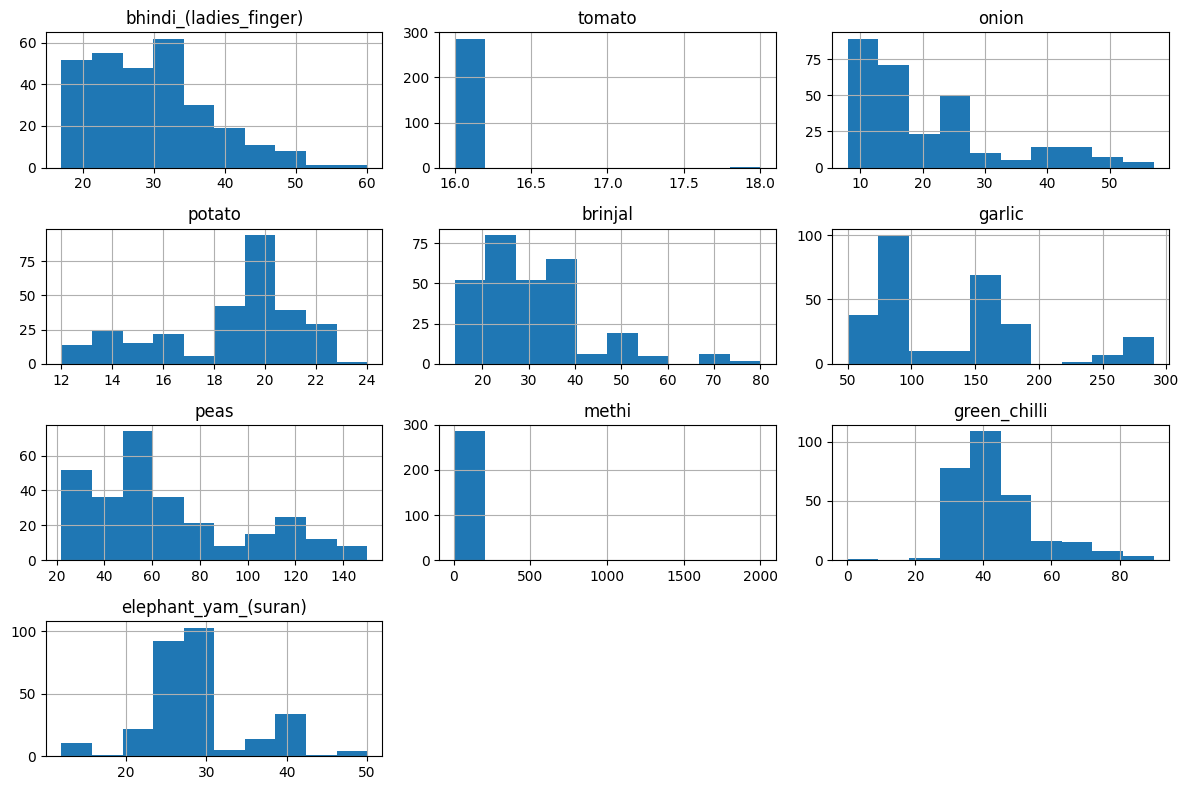

In [11]:
# Histogram for understanding the distribution of each Vegetable

vegetables_df_copy.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

Boxplot fordetect outliers in the dataset by plotting the interquartile range (IQR) of vegetable prices. Any data points outside the whiskers are potential outliers.

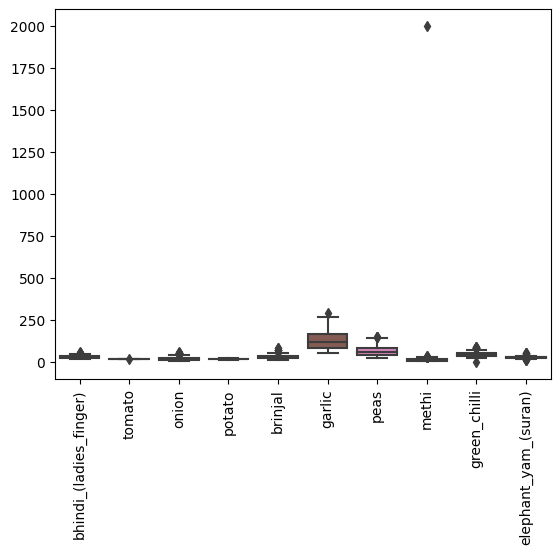

,price_dates,bhindi_(ladies_finger),tomato,onion,potato,brinjal,garlic,peas,methi,green_chilli,elephant_yam_(suran)
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25
5,11-01-2023,35.0,16,18.0,24,25,55,23,6,35.0,30


In [12]:
# Select only numeric columns
numeric_columns = vegetables_df_copy.select_dtypes(include=[np.number])

# Plot boxplot for numeric columns to detect outliers
sns.boxplot(data=numeric_columns)
plt.xticks(rotation=90)  # Rotate x-labels for better readability if there are many columns
plt.show()

# Remove outliers using the IQR method for numeric columns only
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Filtering out rows that have outliers
vegetables_df_copy_filtered = vegetables_df_copy[~((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the cleaned dataset
vegetables_df_copy_filtered.head()


Line plot displays the price trends of tomatoes, onions, and potatoes over time, providing insights into how their prices fluctuate across the time period.

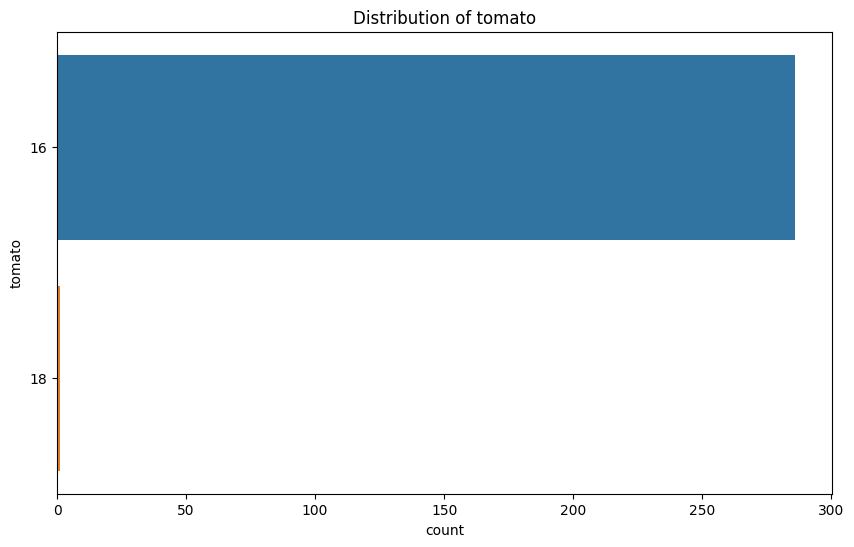

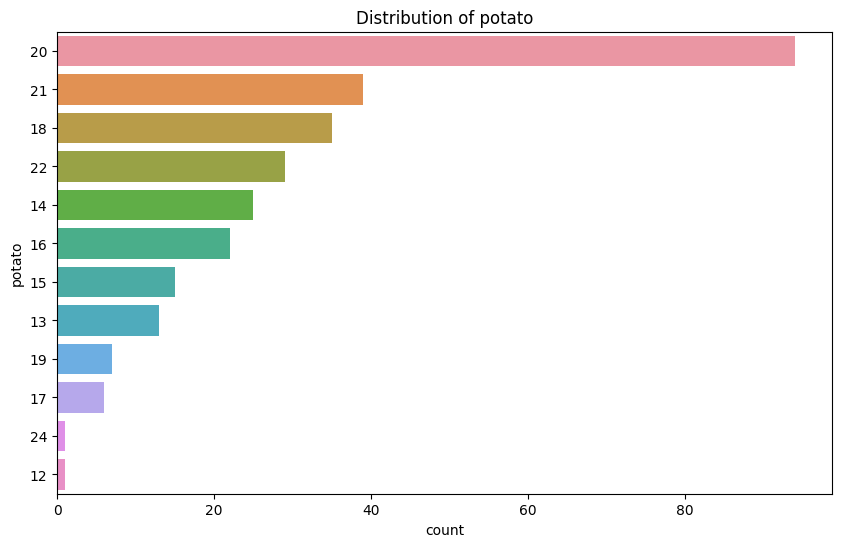

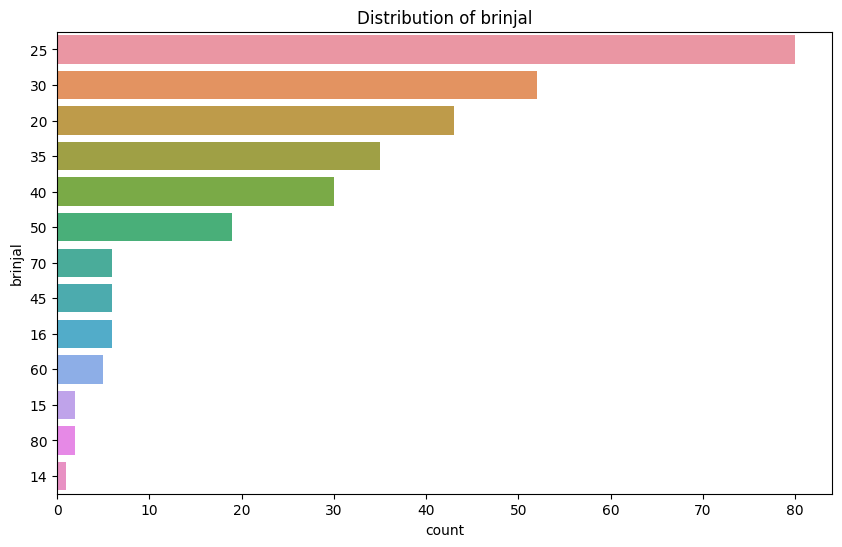

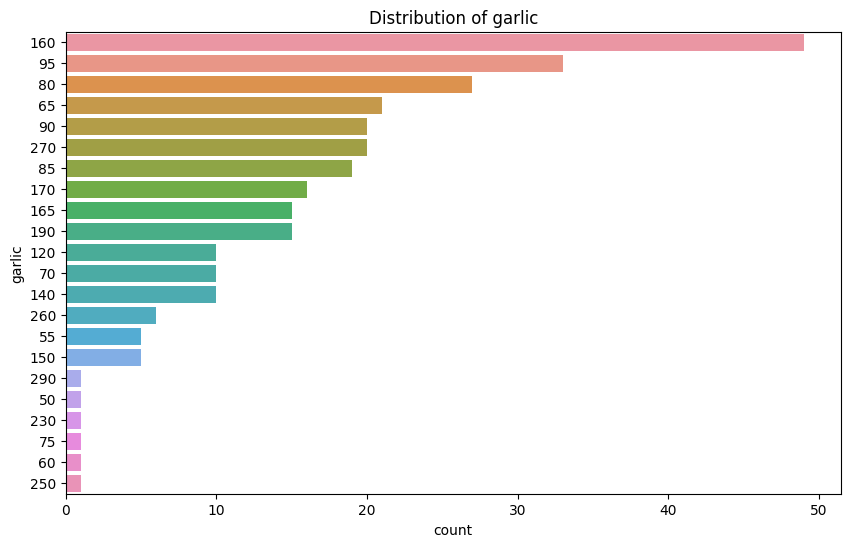

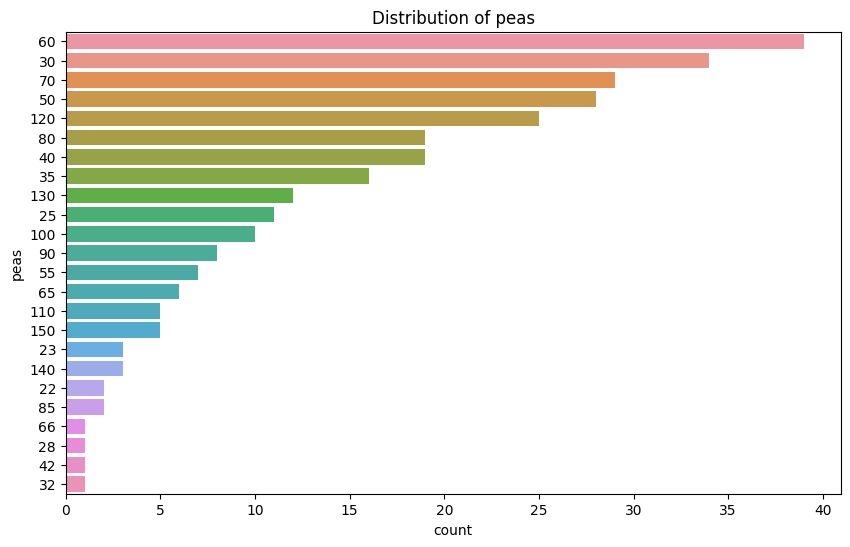

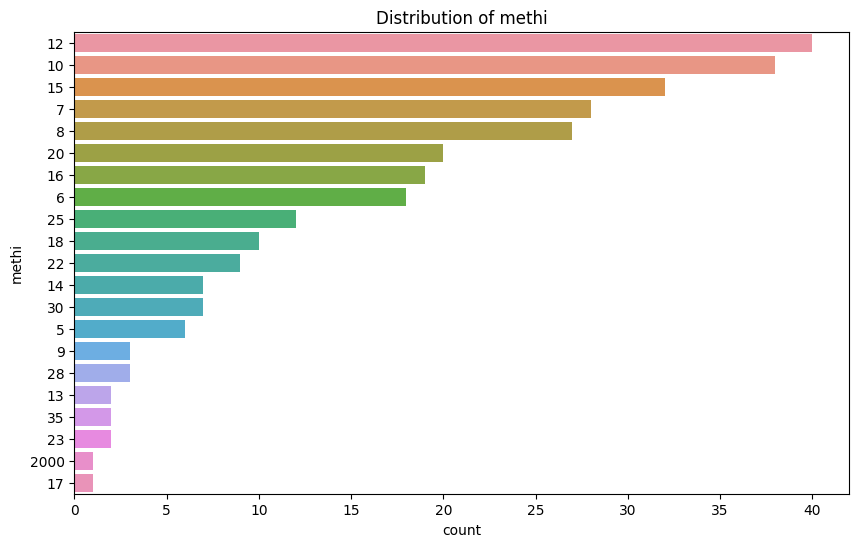

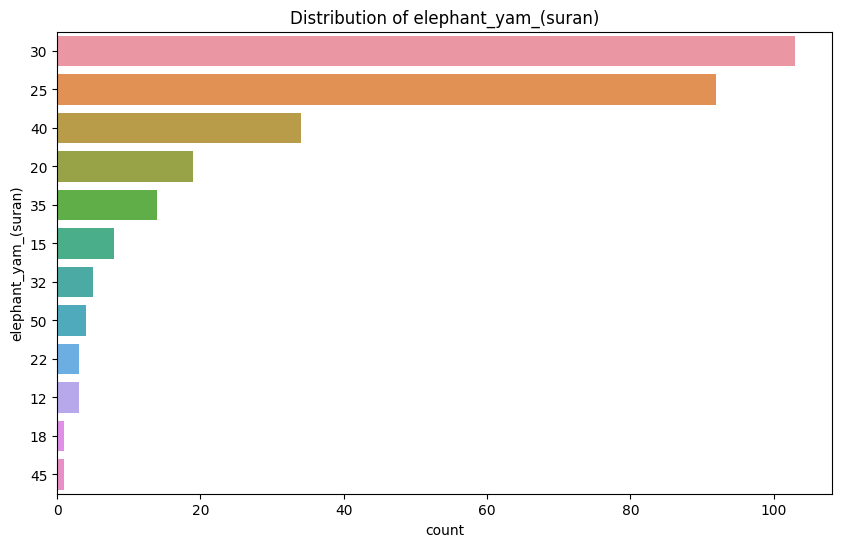

In [13]:
for column in vegetables_df_copy.select_dtypes(include=['int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=vegetables_df_copy, order=vegetables_df_copy[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.show()

Correlation matrix shows the relationship between different vegetable prices. A heatmap is used to visualize the degree of correlation, with a color-coded scale indicating strong or weak correlations.

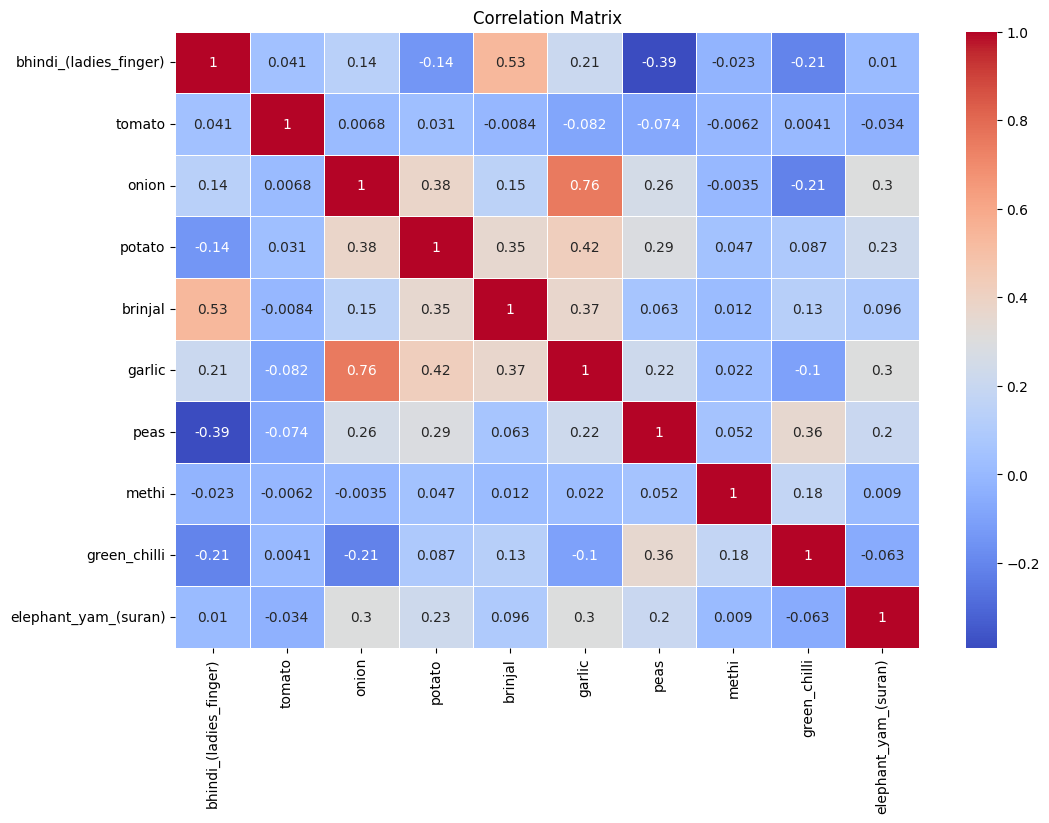

In [14]:
# Select only numeric columns for the correlation matrix
numeric_columns = vegetables_df_copy.select_dtypes(include=[np.number])

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



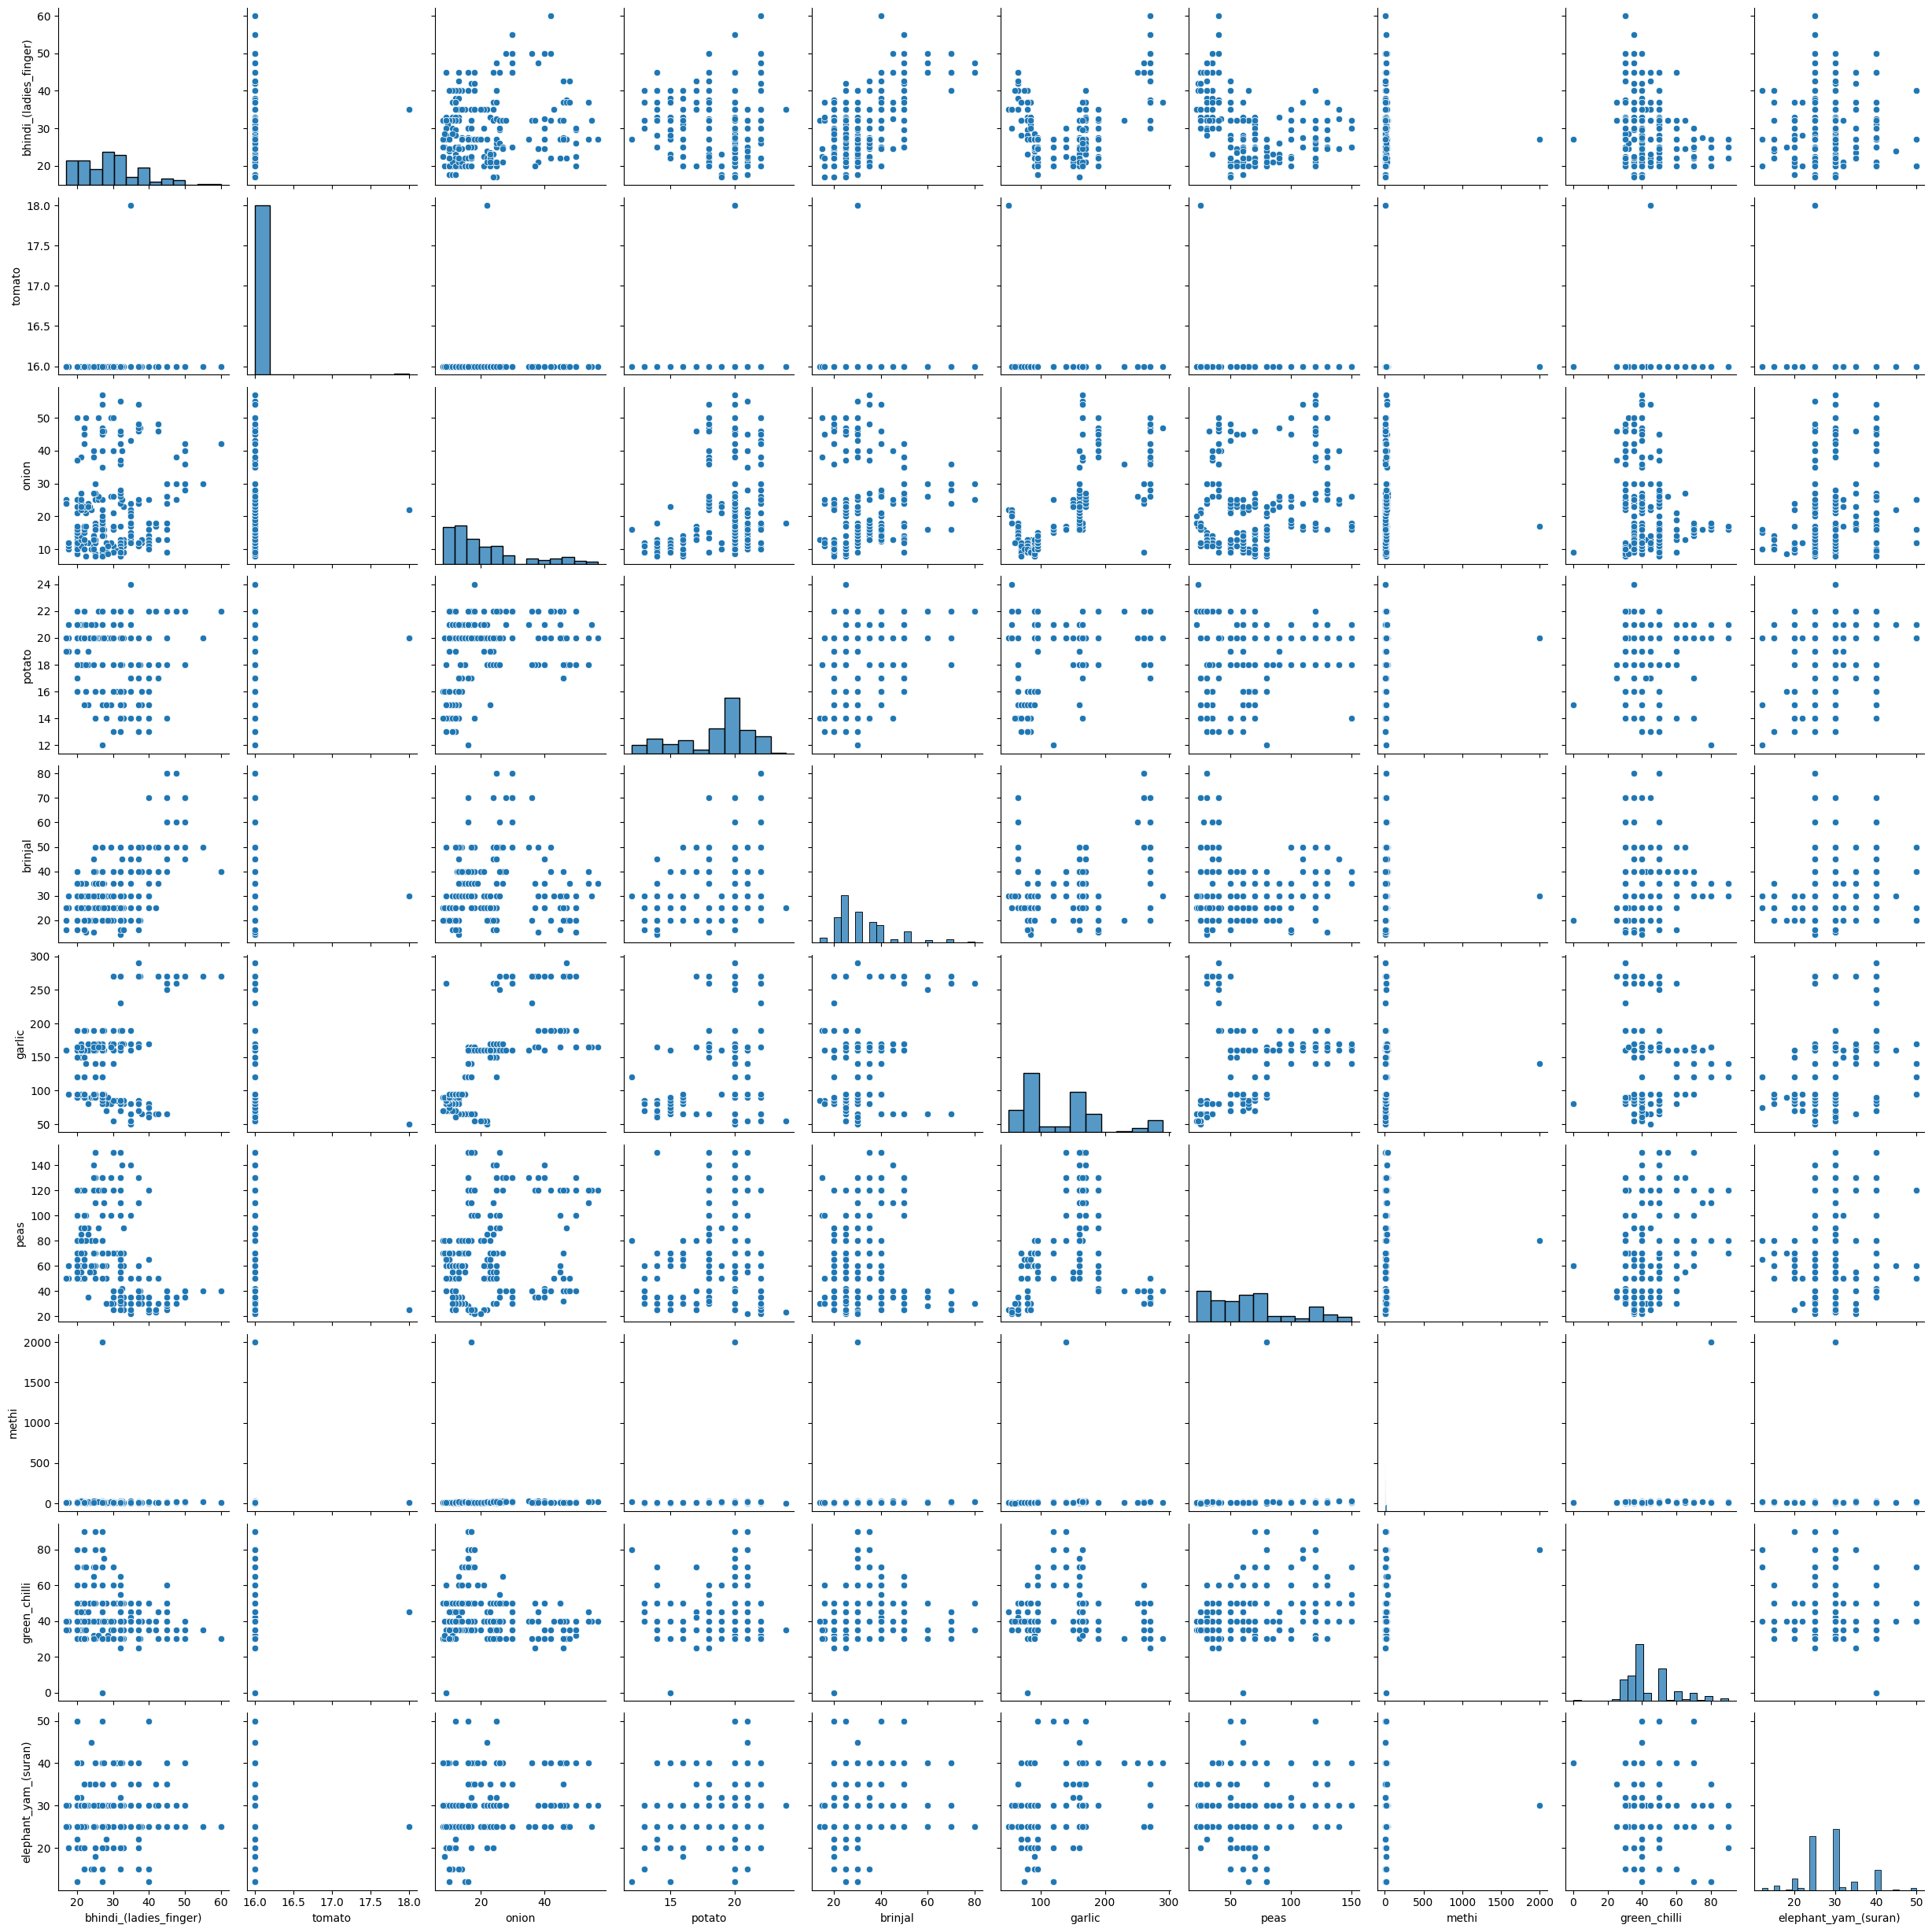

In [15]:
sns.pairplot(vegetables_df_copy)
plt.show()


In [16]:
for i in vegetables_df_copy.columns[1:-1]:
    fig = px.line(vegetables_df_copy, x="price_dates", y=i, title="{} price progression over time".format(i))
    fig.show()

### Feature Engineering

In [17]:
# Convert 'price_dates' column to datetime if not already in datetime format
vegetables_df_copy['price_dates'] = pd.to_datetime(vegetables_df_copy['price_dates'], errors='coerce')

# Extract month and quarter
vegetables_df_copy['month'] = vegetables_df_copy['price_dates'].dt.month
vegetables_df_copy['quarter'] = vegetables_df_copy['price_dates'].dt.quarter

# # Mapping month numbers to month names
# month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April',
#                  5: 'May', 6: 'June', 7: 'July', 8: 'August',
#                  9: 'September', 10: 'October', 11: 'November', 12: 'December'}

vegetables_df_copy['month_name'] = vegetables_df_copy['month'] #.map(month_mapping)

# Display the dataset with the new columns
vegetables_df_copy.head()

,price_dates,bhindi_(ladies_finger),tomato,onion,potato,brinjal,garlic,peas,methi,green_chilli,elephant_yam_(suran),month,quarter,month_name
0,2023-01-01,35.0,18,22.0,20,30,50,25,8,45.0,25,1.0,1.0,1.0
1,2023-02-01,35.0,16,22.0,20,30,55,25,7,40.0,25,2.0,1.0,2.0
2,2023-03-01,35.0,16,21.0,20,30,55,25,7,40.0,25,3.0,1.0,3.0
3,2023-04-01,30.0,16,21.0,22,25,55,25,7,40.0,25,4.0,2.0,4.0
4,2023-08-01,35.0,16,20.0,21,25,55,22,6,35.0,25,8.0,3.0,8.0


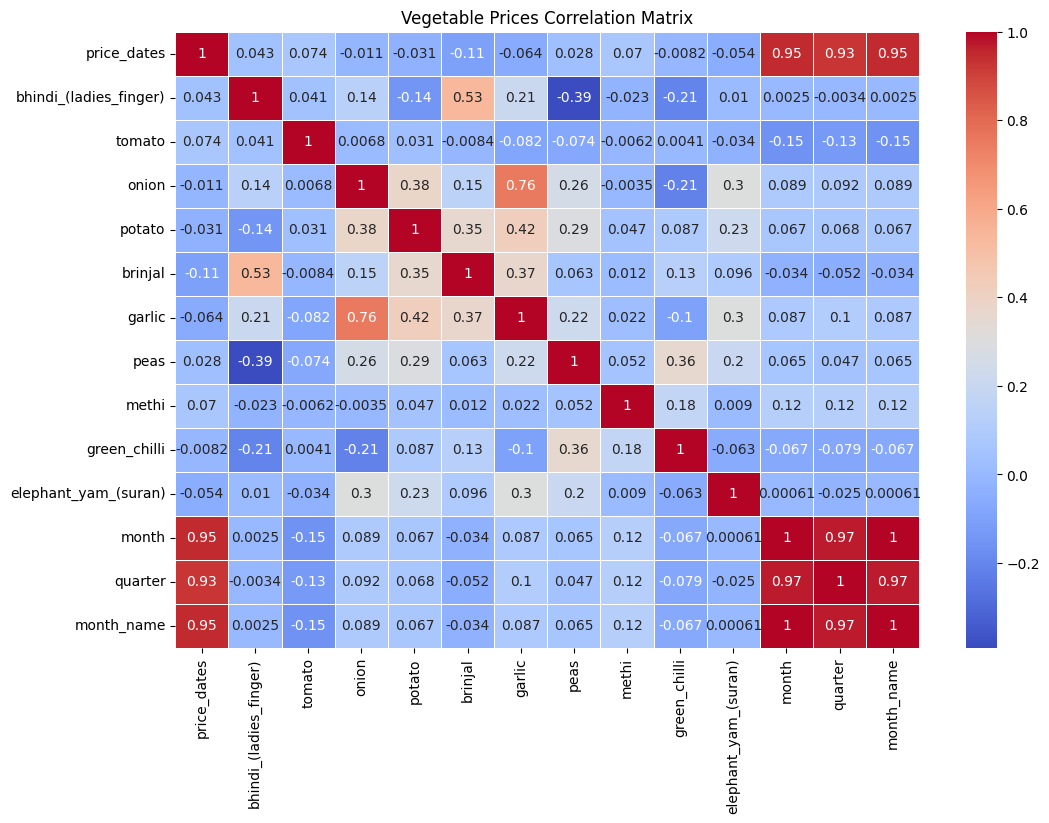

In [18]:
# Correlation matrix between vegetable prices
correlation_matrix = vegetables_df_copy.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Vegetable Prices Correlation Matrix')
plt.show()

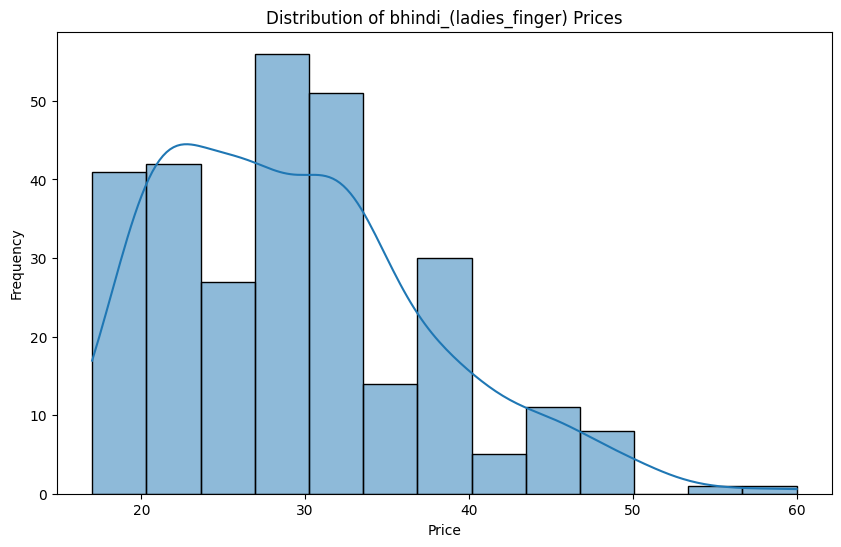

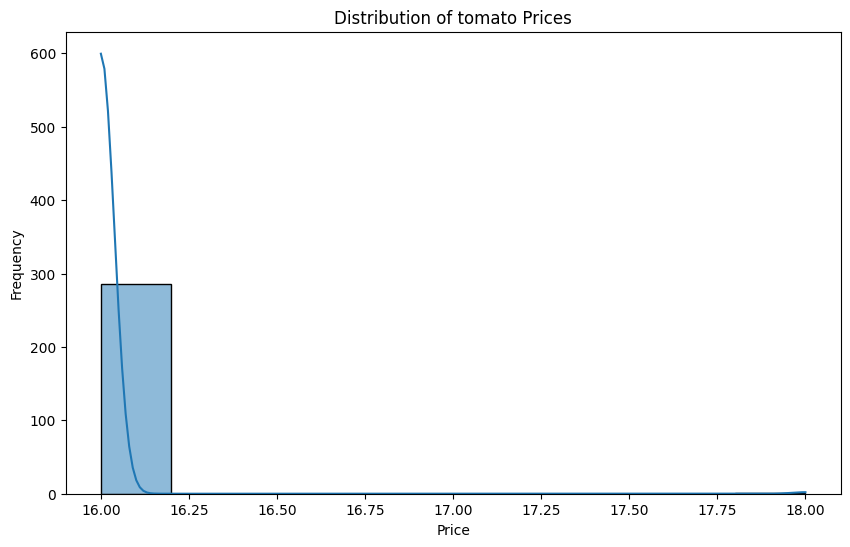

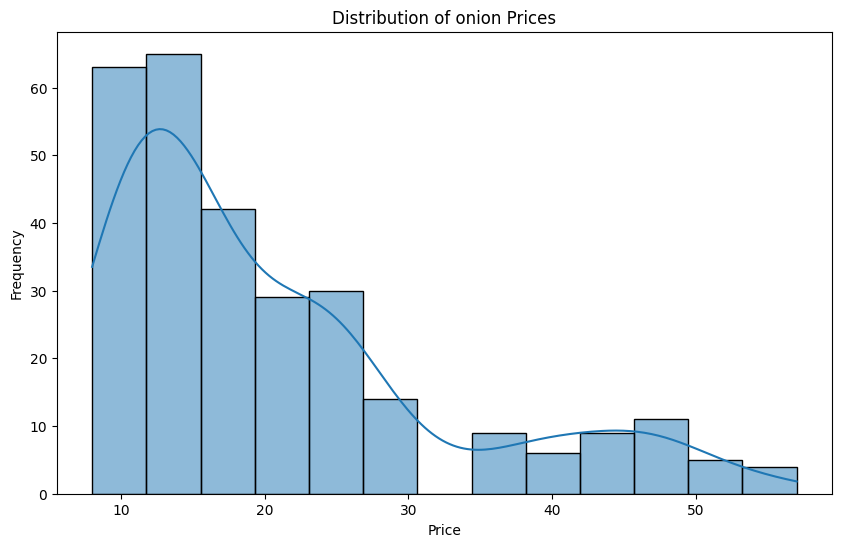

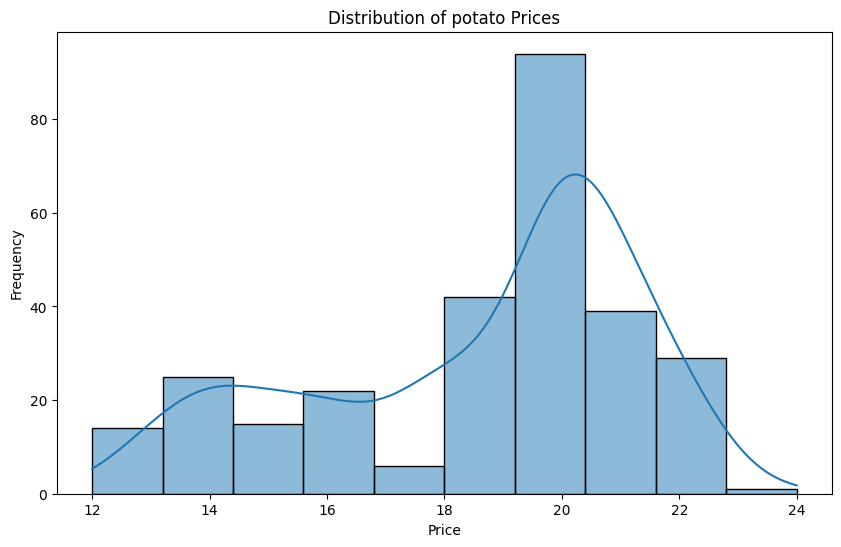

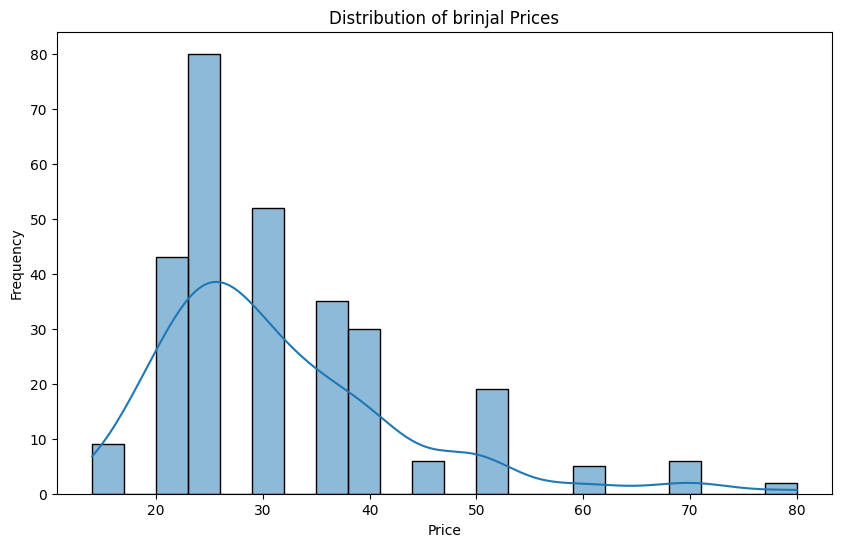

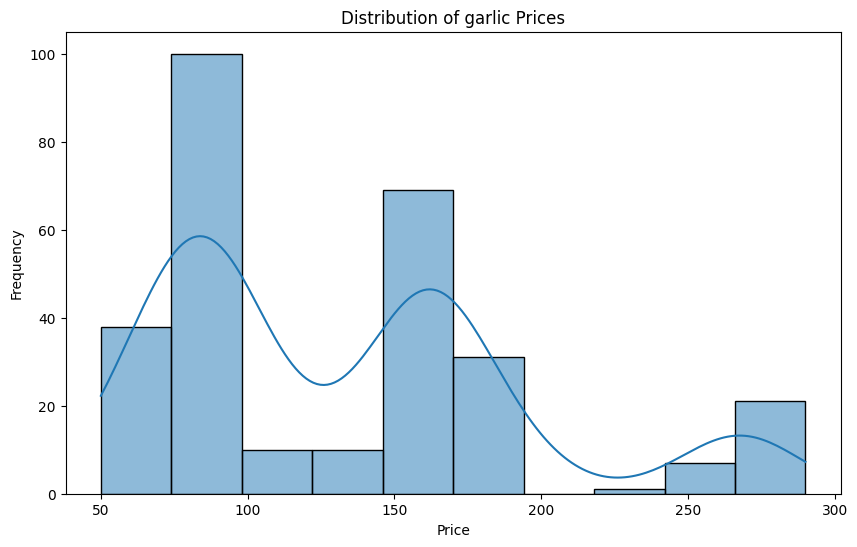

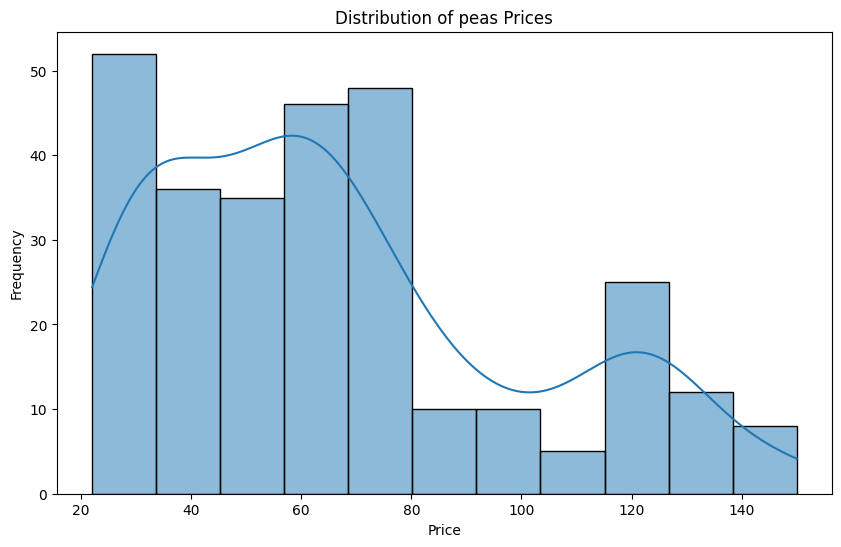

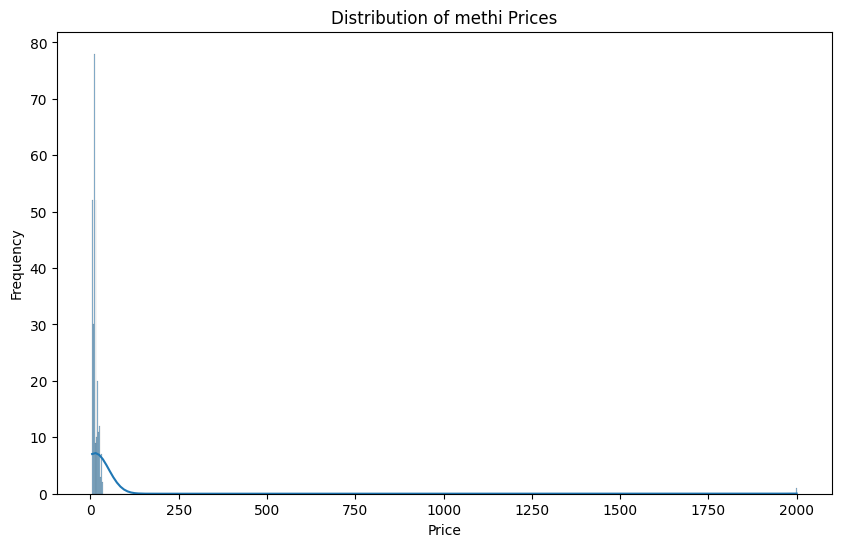

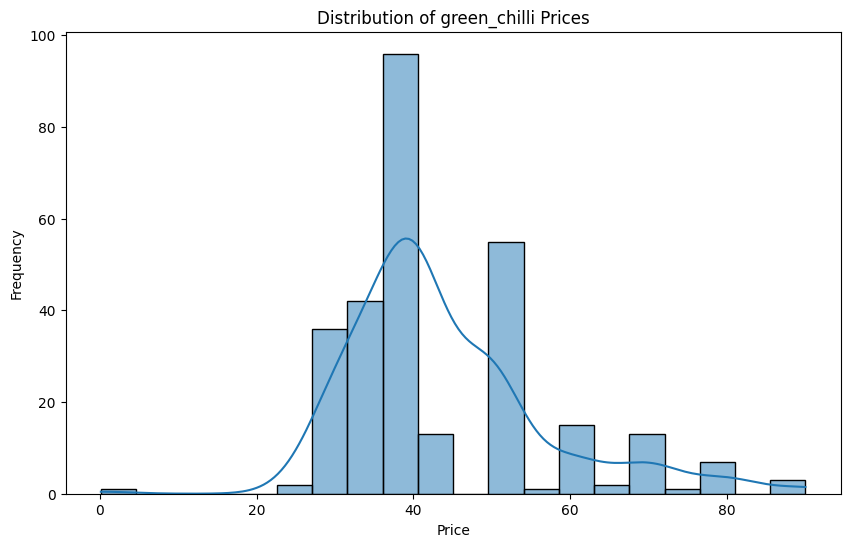

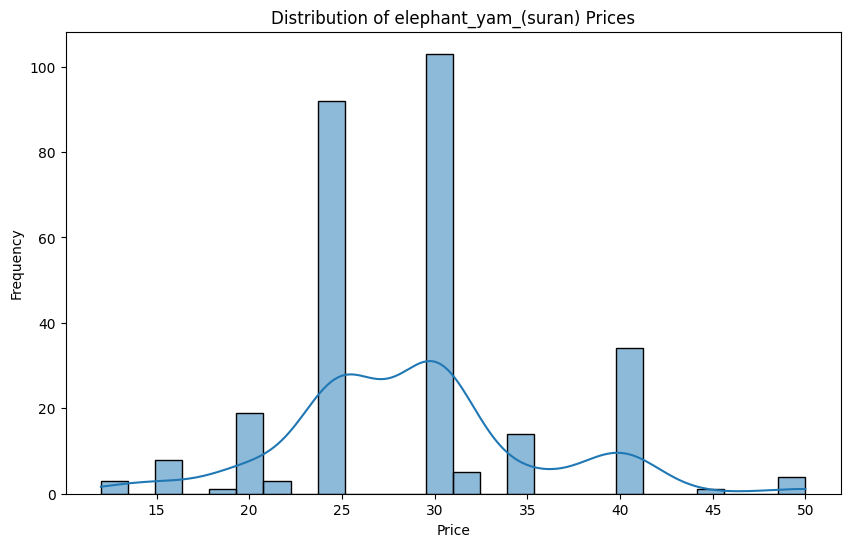

In [19]:
# Plotting the distribution of prices
for column in numeric_columns.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(vegetables_df_copy[column], kde=True)
    plt.title(f'Distribution of {column} Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()


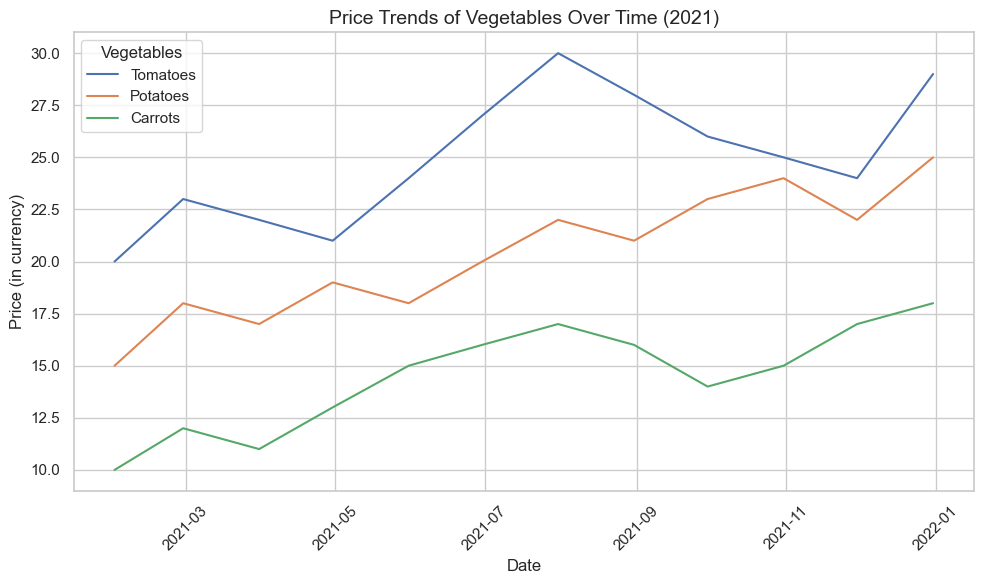

In [22]:
# Example data (replace with actual dataset)
vegetables_df_copy = pd.DataFrame({
    'Date': pd.date_range(start='2021-01-01', periods=12, freq='M'),
    'Tomatoes': [20, 23, 22, 21, 24, 27, 30, 28, 26, 25, 24, 29],
    'Potatoes': [15, 18, 17, 19, 18, 20, 22, 21, 23, 24, 22, 25],
    'Carrots': [10, 12, 11, 13, 15, 16, 17, 16, 14, 15, 17, 18]
})

# Set the style for the plot
sns.set(style="whitegrid")

# Line chart for price trends over time
plt.figure(figsize=(10, 6))
for vegetable in ['Tomatoes', 'Potatoes', 'Carrots']:
    plt.plot(vegetables_df_copy['Date'], vegetables_df_copy[vegetable], label=vegetable)

plt.title('Price Trends of Vegetables Over Time (2021)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (in currency)', fontsize=12)
plt.legend(title='Vegetables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



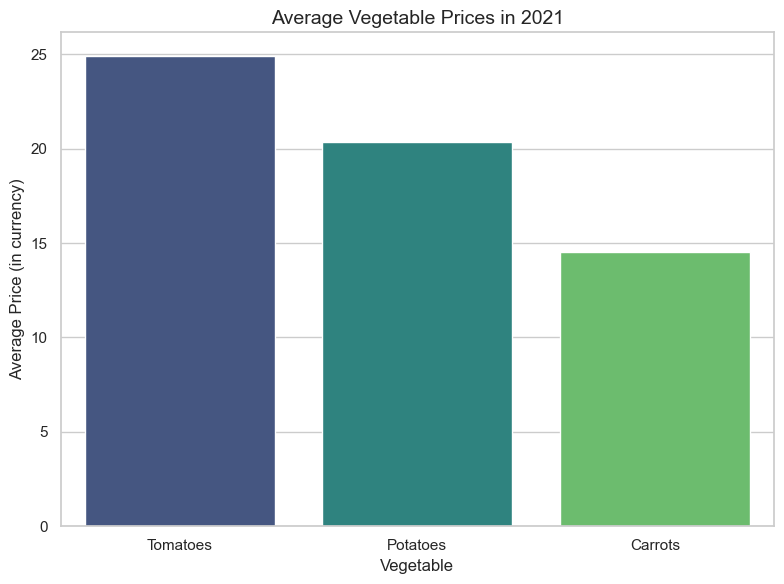

In [23]:
# Bar chart for average prices of vegetables
plt.figure(figsize=(8, 6))
average_prices = vegetables_df_copy[['Tomatoes', 'Potatoes', 'Carrots']].mean()
sns.barplot(x=average_prices.index, y=average_prices.values, palette='viridis')

plt.title('Average Vegetable Prices in 2021', fontsize=14)
plt.xlabel('Vegetable', fontsize=12)
plt.ylabel('Average Price (in currency)', fontsize=12)
plt.tight_layout()
plt.show()
